# Data Wrangling: WeRateDogs

### By: Gregory Gardner

## Table of Contents

  - [Gathering Data](#gathering)
  - [Assessing Data](#assesssing)
      -  [Tidiness](#tidiness)
      -  [Quality](#quality)
  - [Cleaning Data](#cleaning)
  - [Storing, Analyzing, and Visualizing](#storing)

# Gathering Data <a id='gathering'></a>

In [13]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import os
import json
import re
from io import BytesIO

In [2]:
#import twitter-archive-enhanced.csv file that is stored in same directory as notebook
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#download image-predictions.tsv from https and save it in main file directory as notebook
import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
       file.write(response.content)

In [4]:
#import downloaded file with values seperated by '\'
df_image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [83]:
#twitter API
import tweepy

consumer_key = '76lmALy8i3H4SQPPtwjmJpp4U'
consumer_secret = '4FYQyTrxYfD5ub3Ag0c55A332Byj2zO7xrbxbRXIXg3TFSazCO'
access_token = '1002379050541879297-NBkllnpx9Ej3YBux5nDS4c4rNf690D'
access_secret = 'vxrw386fXqT2oP5BVolLxExOm8jCGrFILrrciyUu2H92g'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [84]:
#get tweets via api and save to twee_json.txt
with open('tweet_json.txt','w') as file:
    for ids in df_twitter['tweet_id']:
        try:
            tweet = api.get_status(ids, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write("\n")
        except tweepy.TweepError as e:
            print(str(ids) + str(e.reason))

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308[{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977[{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832[{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464[{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968[{'code': 144, 'message': 'No status found wit

In [87]:
#import json object from tweet_json.txt into a list of dictionaries 
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [88]:
with open('tweet_json.txt') as json_file:
    df_tweet_json = pd.DataFrame(columns = ['id', 'favorite_count', 'retweet_count'])
    for line in json_file:
        tweet = json.loads(line)
        df_tweet_json = df_tweet_json.append({'id': tweet['id'],
            'favorite_count': tweet['favorite_count'],
            'retweet_count': tweet['retweet_count']}, ignore_index=True)

# Assessing Data<a id='assesssing'></a>

### Visual Assessment

In [89]:
df_twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [90]:
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [91]:
df_tweet_json.head(5)

,id,favorite_count,retweet_count
0,892420643555336193,38254,8378
1,892177421306343426,32791,6184
2,891815181378084864,24695,4091
3,891689557279858688,41577,8518
4,891327558926688256,39757,9228


### Programmatic Assessment

In [92]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [93]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null object
favorite_count    2342 non-null object
retweet_count     2342 non-null object
dtypes: object(3)
memory usage: 55.0+ KB


In [95]:
df_twitter.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Bailey              7
an                  7
Toby                7
Milo                6
Stanley             6
Rusty               6
Bella               6
Leo                 6
Oscar               6
Scout               6
Koda                6
Dave                6
Jax                 6
Jack                6
Bentley             5
                 ... 
Heinrich            1
Tanner              1
Craig               1
Jed                 1
Edd                 1
Zeek                1
Siba                1
Wesley              1
Karma               1
Filup               1
Rolf                1
Loomis              1
Goose               1
Lassie              1
Dixie     

In [96]:
df_twitter.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [97]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [98]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [99]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [100]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [101]:
df_image_predictions.p1.sort_values()

1561                      Afghan_hound
1855                      Afghan_hound
1458                      Afghan_hound
1804                      Afghan_hound
446                  African_crocodile
1371                      African_grey
289                African_hunting_dog
1883                          Airedale
678                           Airedale
425                           Airedale
1319                          Airedale
1646                          Airedale
378                           Airedale
49                            Airedale
603                           Airedale
952                           Airedale
189                           Airedale
582                           Airedale
1465                          Airedale
139     American_Staffordshire_terrier
269     American_Staffordshire_terrier
1837    American_Staffordshire_terrier
550     American_Staffordshire_terrier
909     American_Staffordshire_terrier
1582    American_Staffordshire_terrier
758     American_Stafford

In [102]:
df_image_predictions.p2.sort_values()

2024                      Afghan_hound
1701                      Afghan_hound
26                        Afghan_hound
460                       Afghan_hound
1290                      Afghan_hound
53                 African_hunting_dog
983                           Airedale
340                           Airedale
548                           Airedale
1730                          Airedale
1493                          Airedale
716                           Airedale
1950                          Airedale
1632    American_Staffordshire_terrier
1406    American_Staffordshire_terrier
1849    American_Staffordshire_terrier
1824    American_Staffordshire_terrier
1218    American_Staffordshire_terrier
1654    American_Staffordshire_terrier
689     American_Staffordshire_terrier
768     American_Staffordshire_terrier
1903    American_Staffordshire_terrier
1881    American_Staffordshire_terrier
875     American_Staffordshire_terrier
992     American_Staffordshire_terrier
2039    American_Stafford

In [103]:
df_image_predictions.p3.sort_values()

134                       Afghan_hound
850                       Afghan_hound
590                       Afghan_hound
355                       Afghan_hound
107                  African_chameleon
100                       African_grey
766                           Airedale
635                           Airedale
1624                          Airedale
583                           Airedale
368                           Airedale
1754                          Airedale
344                           Airedale
1554                          Airedale
800                           Airedale
657                           Airedale
1435                          Airedale
507     American_Staffordshire_terrier
1338    American_Staffordshire_terrier
1427    American_Staffordshire_terrier
1643    American_Staffordshire_terrier
624     American_Staffordshire_terrier
549     American_Staffordshire_terrier
562     American_Staffordshire_terrier
873     American_Staffordshire_terrier
1687    American_Stafford

In [104]:
df_tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,38254,8378
1,892177421306343426,32791,6184
2,891815181378084864,24695,4091
3,891689557279858688,41577,8518
4,891327558926688256,39757,9228
5,891087950875897856,19954,3070
6,890971913173991426,11681,2035
7,890729181411237888,64565,18605
8,890609185150312448,27428,4212
9,890240255349198849,31480,7279


### Tidiness<a id='tidiness'></a>

1.  Rename the 'id' column in df_tweet_json to 'tweet_id' so that it matches the other two 'tweet_id' columns in the other two data frames.
2.  Join all tables into a single table.
3.  The dog stages are values that are column names.  Condense the 4 columns into a single column filled with the dog stages values. (doggo, pupper, puppo, floof(er).

### Quality<a id='quality'></a>

#### df_twitter
1.  Keep original ratings (no retweets) that have images.  Also, delete tweet data for those tweets that were unable to grab via api during gathering stage.
2.  Change timestamp column to date time format.
3.  The name column has many erroneous values we can fix. (ex. my, not, officially, old, one, quite, the, very, this, unacceptable, a, an).
4.  Change values in denominator column so that all values are 10.
5.  Remove columns from df_twitter. (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id)

#### df_image_predictions
6.  tweet_id and id are integers in all 3 tables.  Changed to string.
7.  Clean columns p1, p2, and p3 in df_image_predictions so that the names are uniform with their capitalization.

#### df_tweet_json
8.  Remove all columns except id, retweet_count, favorite_count

# Cleaning Data <a id='cleaning'></a>

In [105]:
#Make a copy of dataframes
df_twitter_clean = df_twitter.copy()
df_images_clean = df_image_predictions.copy()
df_json_clean = df_tweet_json.copy()

1.Keep original ratings (no retweets) that have images. Also, delete tweet data for those tweets that were unable to grab via api during gathering stage.

#### Define:

Remove rows where tweets are replies.  Remove the rows where the tweet_id is equal to the tweet id's listed in the output message earlier (888202515573088257, 73697596434513921, 872668790621863937, 869988702071779329, 866816280283807744, 861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308, 827228250799742977, 802247111496568832, 775096608509886464, 770743923962707968, 754011816964026368)

#### Code:

In [106]:
#Remove rows where tweets are replies
df_twitter_clean = df_twitter_clean[df_twitter_clean.in_reply_to_status_id.isnull()]
df_twitter_clean = df_twitter_clean[df_twitter_clean.in_reply_to_user_id.isnull()]

#Delete tweets that were unable to grab via api
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 888202515573088257]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 73697596434513921]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 872668790621863937]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 869988702071779329]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 866816280283807744]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 861769973181624320]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 845459076796616705]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 837012587749474308]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 827228250799742977]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 802247111496568832]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 775096608509886464]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 770743923962707968]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 754011816964026368]
df_twitter_clean = df_twitter_clean[df_twitter_clean['tweet_id'] != 842892208864923648]

#### Test:

In [107]:
df_twitter_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [108]:
df_twitter_clean.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

In [109]:
df_twitter_clean[df_twitter_clean['tweet_id'] == 869988702071779329]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [110]:
df_twitter_clean[df_twitter_clean['tweet_id'] == 775096608509886464]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


2.Change timestamp column to date time format and separate into 3 separate columns: day, month, year.

#### Define:
Change timestamp column to date time using astype.

#### Code:

In [111]:
df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean.timestamp)

#### Test:

In [112]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2265 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2265 non-null datetime64[ns]
source                        2265 non-null object
text                          2265 non-null object
retweeted_status_id           169 non-null float64
retweeted_status_user_id      169 non-null float64
retweeted_status_timestamp    169 non-null object
expanded_urls                 2261 non-null object
rating_numerator              2265 non-null int64
rating_denominator            2265 non-null int64
name                          2265 non-null object
doggo                         2265 non-null object
floofer                       2265 non-null object
pupper                        2265 non-null object
puppo                         2265 non-null object
dtypes: datetime64[ns](1),

3.The name column has many erroneous values we can fix. (ex. my, not, officially, old, one, quite, the, very, this, unacceptable, a, an). Also, change values in names column so that the first letter is capitalized.

#### Define:

Thru visual assessment we can find the proper name of the dog in certain phrases:
- "This is (name)"
- "Meet (name)"
- "Say hello to (name)"
- "Here we have (name)"
- "named (name)"

We can make a list and append the list with the proper names and replace those names we find in the dog columns to clean up some of the erroneous values.  Further, we can change any of the erroneous names we find via visual assessment to 'None'.

#### Code:

In [113]:
dog_names = []
#adds the name of the dog found in text if the word following any of the matching strings begins with a capital letter
#if not found then adds a 'NaN'
for text in df_twitter_clean['text']:
    if 'This is ' in text and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    elif 'Meet ' in text and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    elif 'Say hello to ' in text and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif 'Here we have ' in text and re.match(r'[A-Z].*',text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif 'named ' in text and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    else:
        dog_names.append('NaN')

In [114]:
#test to see if we have proper amount of values in list
len(dog_names)

2265

In [115]:
#Visual assessment of list created
dog_names

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'NaN',
 'Jax',
 'NaN',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'NaN',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'NaN',
 'Canela',
 'NaN',
 'NaN',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'NaN',
 'NaN',
 'Maisey',
 'NaN',
 'This',
 'NaN',
 'Earl',
 'Lola',
 'Kevin',
 'NaN',
 'NaN',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'NaN',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'NaN',
 'Elliot',
 'Louis',
 'NaN',
 'Bella',
 'Jesse',
 'NaN',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'This',
 'Steven',
 'Beau',
 'Snoopy',
 'NaN',
 'NaN',
 'NaN',
 'Shadow',
 'Emmy',
 'Aja',
 'NaN',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'NaN',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'NaN',
 'NaN',
 'Cash',
 'This',
 'Jed',
 'NaN',
 'Sebastian',
 'This',
 'NaN',
 'This',
 'Sierra',
 'NaN',
 'NaN',
 'Monkey',
 'NaN',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'T

In [116]:
#replace the dog names in the 'name' column where we found a value that was not 'NaN' nor 'This'.
df_twitter_clean['new_name'] = dog_names
df_twitter_clean['name'] = np.where((df_twitter_clean['new_name']!= 'NaN') | (df_twitter_clean['new_name']!='This'),
                                    df_twitter_clean['new_name'],df_twitter_clean['name'])

In [117]:
#Drop new_name column
df_twitter_clean.drop(['new_name'], axis=1, inplace=True)

In [118]:
#Replace NaN and This in name column with 'None'
df_twitter_clean.name = df_twitter_clean.name.replace('This', 'None')
df_twitter_clean.name = df_twitter_clean.name.replace('NaN', 'None')

#### Test:

In [119]:
df_twitter_clean.name.value_counts()

None        876
Lucy         11
Cooper       10
Oliver       10
Charlie      10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          8
Daisy         7
Koda          6
Bailey        6
Bo            6
Oscar         6
Stanley       6
Toby          6
Jax           6
Bella         6
Louis         5
Leo           5
Bentley       5
Chester       5
Milo          5
Buddy         5
Rusty         5
Scout         5
Larry         4
Cassie        4
Jeffrey       4
           ... 
Ralpher       1
Danny         1
Harnold       1
Tonks         1
Ronduh        1
Karma         1
Pubert        1
Trigger       1
Burke         1
Livvie        1
Ivar          1
Kobe          1
Jersey        1
Cermet        1
Ace           1
Trevith       1
Dale          1
Storkson      1
Filup         1
Rolf          1
Loomis        1
Goose         1
Lassie        1
Dixie         1
Jomathan      1
Coleman       1
Randall       1
Bluebert      1
Beemo         1
Cecil         1
Name: name, Length: 936,

4.Change values in denominator column so that all values are 10.

#### Define:
Change all values in the rating_denominator column to 10

#### Code:

In [120]:
df_twitter_clean.rating_denominator = 10

#### Test:

In [121]:
df_twitter_clean.rating_denominator.unique()

array([10])

5.Remove columns from df_twitter. (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id)

#### Define:
Drop columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id.

#### Code:

In [122]:
df_twitter_clean = df_twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
                                         'retweeted_status_timestamp', 'in_reply_to_status_id', 
                                         'in_reply_to_user_id'], axis = 1)

#### Test:

In [123]:
df_twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

6.  tweet_id and id are integers in all 3 tables.  Changed to string.

#### Define:
Change tweet_id column in df_twitter_clean and df_images_clean to strings and id in df_json_clean to string with astype.

#### Code:

In [124]:
df_twitter_clean.tweet_id = df_twitter_clean.tweet_id.astype(str)
df_images_clean.tweet_id = df_images_clean.tweet_id.astype(str)
df_json_clean.id = df_json_clean.id.astype(str)

#### Test:

In [125]:
df_twitter_clean.tweet_id.dtype

dtype('O')

In [126]:
df_images_clean.tweet_id.dtype

dtype('O')

In [127]:
df_json_clean.id.dtype

dtype('O')

7.  Clean columns p1, p2, and p3 in df_image_predictions so that the names are uniform with their capitalization.

#### Define:
Use str.title to capitalize the first letter of each word for p1, p2, and p3.

#### Code:

In [128]:
df_images_clean.p1 = df_images_clean.p1.str.title()
df_images_clean.p2 = df_images_clean.p2.str.title()
df_images_clean.p3 = df_images_clean.p3.str.title()

#### Test:

In [129]:
df_images_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


8.Remove all columns except id, retweet_count, favorite_count

#### Define:
Set df_json_clean to only have tweet_id, retweet_count, favorite_count columns.

#### Code:

In [133]:
df_json_clean = df_json_clean[['id', 'favorite_count', 'retweet_count']]

#### Test:

In [134]:
df_json_clean.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,38254,8378


1.  Rename the 'id' column in df_tweet_json to 'tweet_id' so that it matches the other two 'tweet_id' columns in the other two data frames.

#### Define:
Rename column from 'id' to 'tweet_id' in df_json_clean

#### Code:

In [135]:
df_json_clean.rename(columns = {'id' : 'tweet_id'}, inplace=True)

#### Test:

In [136]:
df_json_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38254,8378


2.  Join all tables into a single table.

#### Define:
Join all 3 tables with an inner join on the tweet_id using pd.merge.

#### Code:

In [137]:
df_twitter_clean = pd.merge(df_twitter_clean, df_images_clean, how='inner', on = ['tweet_id'])
df_twitter_clean = pd.merge(df_twitter_clean, df_json_clean, how='inner', on=['tweet_id'])

#### Test:

In [138]:
df_twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

3.  The dog stages are values that are column names. Condense the 4 columns into a single column filled with the dog stages values. (doggo, pupper, puppo, floof(er).

#### Define:
Melt the  'doggo', 'floofer', 'pupper', 'puppo' columns to 1 'dog_stage' column with the appropriate value.

#### Code:

In [139]:
#create new df and pull appropriate columns to melt
df_stages = df_twitter_clean[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']]

In [140]:
#melt columns
df_stages = pd.melt(df_stages, id_vars = ['tweet_id'], value_name='dog_stage')

In [141]:
df_stages.dog_stage.value_counts()

None       7850
pupper      219
doggo        79
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [142]:
#drop stages column
df_stages = df_stages[['tweet_id', 'dog_stage']]

In [143]:
#Merge df_stages
df_twitter_clean = pd.merge(df_twitter_clean, df_stages, on=['tweet_id'])

In [144]:
#drop columns
df_twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace=True)

In [145]:
#Sort by dogs_stage then drop duplicated based on tweet_id 
df_twitter_clean = df_twitter_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

#### Test:

In [146]:
df_twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count', 'dog_stage'],
      dtype='object')

In [147]:
df_twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
5428,684481074559381504,2016-01-05 21:06:19,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,...,True,Pomeranian,0.020307,True,Polecat,0.017357,False,4086,1256,None
5424,684567543613382656,2016-01-06 02:49:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,https://twitter.com/dog_rates/status/684567543...,4,10,Bobby,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,...,False,Llama,0.229145,False,Seat_Belt,0.209393,False,3179,1327,None
5420,684594889858887680,2016-01-06 04:38:35,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",https://twitter.com/dog_rates/status/684594889...,10,10,None,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,...,True,English_Setter,0.035352,True,Brittany_Spaniel,0.003879,True,9436,3807,None
5416,684800227459624960,2016-01-06 18:14:31,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,https://pbs.twimg.com/media/CYDmK7ZVAAI_ylL.jpg,1,...,True,Norfolk_Terrier,0.161885,True,West_Highland_White_Terrier,0.120992,True,2861,1073,None
5408,684902183876321280,2016-01-07 00:59:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Perry. He's an Augustus Gloopster. Ver...,https://twitter.com/dog_rates/status/684902183...,11,10,Perry,https://pbs.twimg.com/media/CYFC5lmWAAAEIho.jpg,1,...,True,Cardigan,0.291447,True,Dingo,0.000185,False,1989,570,None
5435,684460069371654144,2016-01-05 19:42:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He's a Western Sagittarius Dookm...,https://twitter.com/dog_rates/status/684460069...,10,10,Jeph,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,...,True,Chesapeake_Bay_Retriever,0.194897,True,American_Staffordshire_Terrier,0.059471,True,2089,596,None
5460,684122891630342144,2016-01-04 21:23:02,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11,10,None,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,1,...,False,Arabian_Camel,0.046976,False,Jaguar,0.025785,False,2105,514,None
5456,684177701129875456,2016-01-05 01:00:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,...,True,German_Shepherd,0.162647,True,Golden_Retriever,0.138612,True,2129,726,None
5452,684188786104872960,2016-01-05 01:44:52,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",https://twitter.com/dog_rates/status/684188786...,10,10,None,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,...,True,American_Staffordshire_Terrier,0.082953,True,Staffordshire_Bullterrier,0.069760,True,3677,1261,None
5448,684195085588783105,2016-01-05 02:09:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,...,True,Toy_Terrier,0.121809,True,Boston_Bull,0.095981,True,2028,560,None


In [148]:
df_twitter_clean.dog_stage.value_counts()

None       1727
pupper      219
doggo        67
puppo        24
floofer       8
Name: dog_stage, dtype: int64

# Storing, Analyzing, and Visualizing <a id='storing'></a>

In [149]:
#Store cleaned dataframe to 'twitter_archive_master.csv'
df_twitter_clean.to_csv('twitter_archive_master.csv', index = False)

In [150]:
#change name for easier reference
df = df_twitter_clean

#### Retweet Count and Favorite Count over time

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 5428 to 3107
Data columns (total 22 columns):
tweet_id              2045 non-null object
timestamp             2045 non-null datetime64[ns]
source                2045 non-null object
text                  2045 non-null object
expanded_urls         2045 non-null object
rating_numerator      2045 non-null int64
rating_denominator    2045 non-null int64
name                  2045 non-null object
jpg_url               2045 non-null object
img_num               2045 non-null int64
p1                    2045 non-null object
p1_conf               2045 non-null float64
p1_dog                2045 non-null bool
p2                    2045 non-null object
p2_conf               2045 non-null float64
p2_dog                2045 non-null bool
p3                    2045 non-null object
p3_conf               2045 non-null float64
p3_dog                2045 non-null bool
favorite_count        2045 non-null object
retweet_count         2045 n

In [151]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
% matplotlib inline

In [165]:
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line', color = 'g',
                                                                                          figsize = (13,9))
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line', color = 'b',
                                                                                           figsize=(13,9))
plt.title('Retweet Count and Favorite Count Over Time', fontsize = 16)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('(Year, Month)', fontsize = 18)
plt.legend(('Retweets', 'Favorites'), fontsize = 16)
plt.figure(figsize = (20,20))

DataError: No numeric types to aggregate

#### Common Dog Names

Text(0.5,1,'Most Common Dog Names')

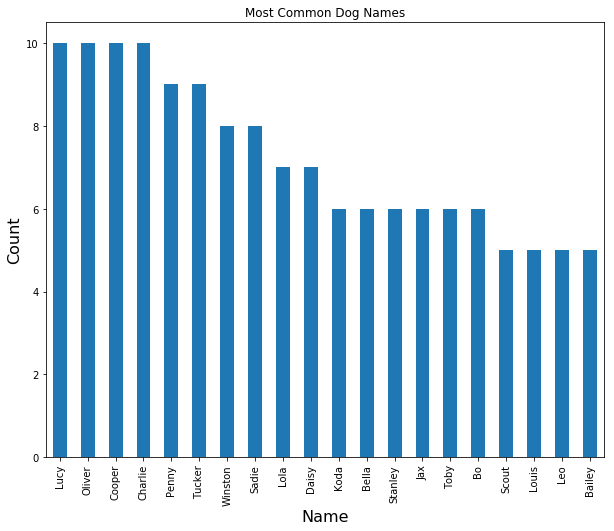

In [154]:
df_name = df.query('name != "None"')
df_name.name.value_counts()[:20].plot(kind = 'bar', figsize = (10,8))
plt.xlabel('Name', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Most Common Dog Names')

#### Dog Stages and Ratings

In [155]:
df_stage = df
df_stage = df_stage[['tweet_id', 'dog_stage', 'rating_numerator', 'favorite_count', 'retweet_count']]

In [156]:
#remove None from data set
df_stage.dog_stage = df_stage.dog_stage[~df_stage.dog_stage.str.contains("None")]

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


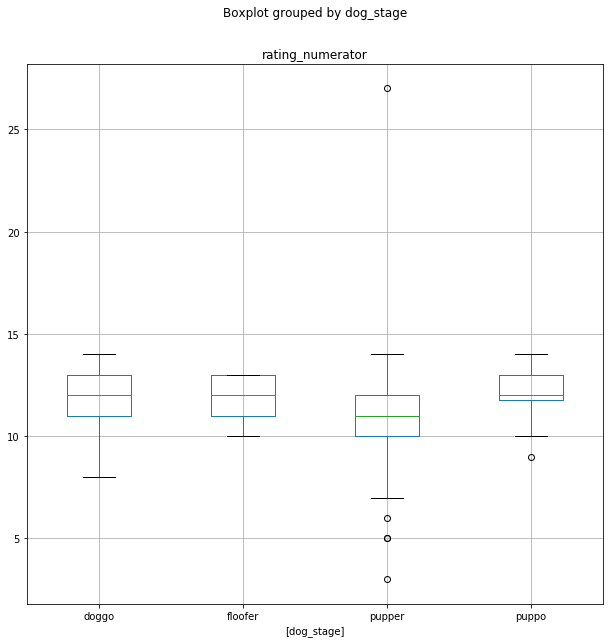

In [157]:
df_stage.boxplot(column=['rating_numerator'], by=['dog_stage'], figsize = (10,10))

In [158]:
df_stage.query('dog_stage == "pupper" & rating_numerator == "27"')

,tweet_id,dog_stage,rating_numerator,favorite_count,retweet_count
2422,778027034220126208,pupper,27,7030,1782


In [159]:
#Remove outliers to get a better fitting box plot
df_stage = df_stage.drop(df_stage[df_stage.rating_numerator > 15].index)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


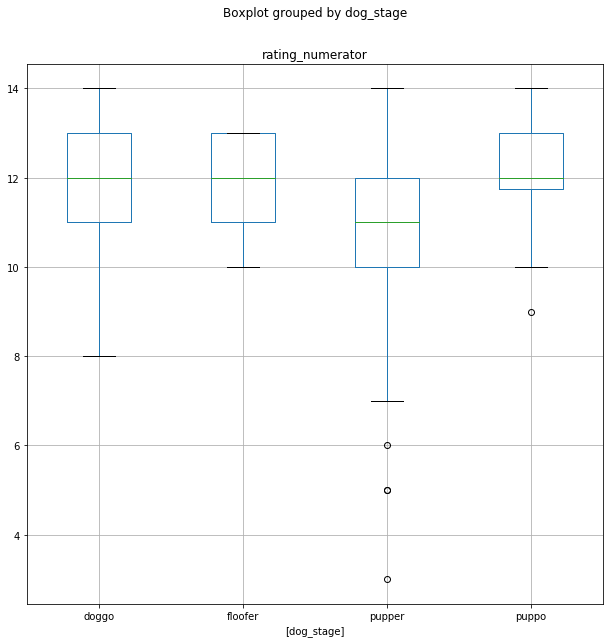

In [160]:
df_stage.boxplot(column=['rating_numerator'], by=['dog_stage'], figsize = (10,10))

In [161]:
df_stage.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,67.0,11.970149,1.476792,8.0,11.00,12.0,13.0,14.0
floofer,8.0,11.875000,1.125992,10.0,11.00,12.0,13.0,13.0
pupper,218.0,10.706422,1.766575,3.0,10.00,11.0,12.0,14.0
puppo,24.0,12.041667,1.267629,9.0,11.75,12.0,13.0,14.0


#### Dog Rating Distribution

Text(0.5,1,'Dog Rating Distribution')

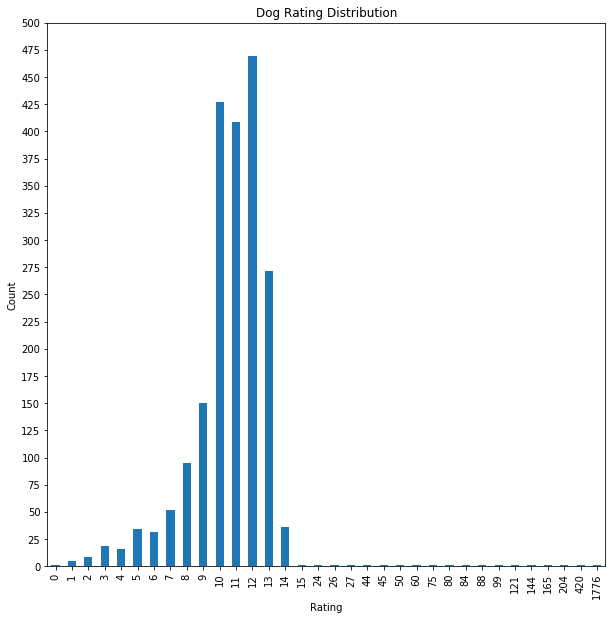

In [162]:
bar = df.rating_numerator.value_counts().sort_index().plot(kind='bar', figsize = (10,10))
bar.set_yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500])
bar.set_xlabel('Rating')
bar.set_ylabel('Count')
bar.set_title('Dog Rating Distribution')

In [163]:
df.rating_numerator.value_counts().sort_index()

0         1
1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        95
9       150
10      427
11      409
12      469
13      272
14       36
15        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64